In [2]:
C = Composition([1,2,3,1,1,3])
print("Composition C: ",C)
# No. of parts of C, or deg(C)
print("Degree of C: ",len(C))
# The underlying integer n, of which C is a composition of, or the sum of all parts 
print("C is an integer composition of n =",C.size())
# Get the support of C (underlying partition)
print("Support of C or s(C) is: ", C.to_partition())
# Get all compositions B, B<=C in the poset of compositions of n
print("Compositions less than or eq. to C:", list(C.fatter()))
# Get all compositions D, C<=D in the poset of compositions of n
print("Compositions greater than or eq. to C:", list(C.finer()))
# Opposite Composition
print("Opposite composition is: ", C.reversed())



Composition C:  [1, 2, 3, 1, 1, 3]
Degree of C:  6
C is an integer composition of n = 11
Support of C or s(C) is:  [3, 3, 2, 1, 1, 1]
Compositions less than or eq. to C: [[1, 2, 3, 1, 1, 3], [1, 2, 3, 1, 4], [1, 2, 3, 2, 3], [1, 2, 3, 5], [1, 2, 4, 1, 3], [1, 2, 4, 4], [1, 2, 5, 3], [1, 2, 8], [1, 5, 1, 1, 3], [1, 5, 1, 4], [1, 5, 2, 3], [1, 5, 5], [1, 6, 1, 3], [1, 6, 4], [1, 7, 3], [1, 10], [3, 3, 1, 1, 3], [3, 3, 1, 4], [3, 3, 2, 3], [3, 3, 5], [3, 4, 1, 3], [3, 4, 4], [3, 5, 3], [3, 8], [6, 1, 1, 3], [6, 1, 4], [6, 2, 3], [6, 5], [7, 1, 3], [7, 4], [8, 3], [11]]
Compositions greater than or eq. to C: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1], [1, 1, 1, 1, 1, 1, 1, 1, 3], [1, 1, 1, 1, 2, 1, 1, 1, 1, 1], [1, 1, 1, 1, 2, 1, 1, 1, 2], [1, 1, 1, 1, 2, 1, 1, 2, 1], [1, 1, 1, 1, 2, 1, 1, 3], [1, 1, 1, 2, 1, 1, 1, 1, 1, 1], [1, 1, 1, 2, 1, 1, 1, 1, 2], [1, 1, 1, 2, 1, 1, 1, 2, 1], [1, 1, 1, 2, 1, 1, 1, 3], [1, 1, 1, 3, 1, 1, 1, 1, 1]

In [3]:
a, b, c, d, e = var('a b c d e')
assume(a>0,b>0,c>0,d>0,e>0)
assume(a, 'integer')
assume(b, 'integer')
assume(c, 'integer')
assume(d, 'integer')
assume(e, 'integer')
C = Composition([a,b])
C.fatter().list()

[[a, b], [a + b]]

In [7]:
print(len(C))
deg_C = len(C)
q = var('q')

2


In [4]:
def dist_C_Cbar(U):
    Ubar = U.reversed()
    deg_U = len(U)
    dist = 0
    for i in range(deg_U):
        for j in range(deg_U-i-1):
            dist += U[i]*U[deg_U-j-1]
    return dist        
    

In [7]:
(1+((-1)^(deg_C))*((q)^(dist_C_Cbar(C))))

q^(a*b) + 1

In [5]:
def q_mobius(U):
    deg_U = len(U)
    if deg_U == 1:
        return 1
    else:
        lesser_comps = list(U.fatter())[1:]
        card_lesser_or_equal_comps = len(lesser_comps)
        denominator = (1+((-1)^(deg_U))*((q)^(dist_C_Cbar(U))))
        sum_lower = 0
        for comp in lesser_comps:
            sum_lower += q_mobius(comp)
        sum_final = -1*sum_lower
        
        return (sum_final/denominator).factor()
    

def invariant_q_zeta_func(T,U):
    ref_splits = list(U.refinement_splitting(T))
    prod = 1
    for ref_split_i in ref_splits:
        prod *= q_zeta(ref_split_i)
    return prod
        

def q_zeta(U):
    deg_U = len(U)
    if deg_U == 1:
        return 1
    else:
        leq_comp_without_O = list(U.fatter())[1:-1]
        #card_lesser = len(lesser_comps)
        denominator = (1+((-1)^(deg_U))*((q)^(dist_C_Cbar(U))))
        sum_lower = ((-1)^(deg_U))
        for T in leq_comp_without_O:
            deg_T = len(T)
            print(T)
            sum_lower += ((-1)^(deg_T))*invariant_q_zeta_func(T,U)
        
        #print(U,(sum_lower/denominator).factor())
        return (sum_lower/denominator).factor()
        

In [8]:
from sage.combinat.q_analogues import q_factorial

U = Composition([1,1,1,1])
T = Composition([3,2,1])

qdw = q_zeta(U)
dqw = q_mobius(U)
print(qdw,'\n')
print(dqw,'\n')
print(latex(qdw),'\n')
print(latex(dqw),'\n')
#poly = q_mobius(U)
#poly

[1, 1, 2]
[1, 2, 1]
[1, 3]
[1, 2]
[2, 1]
[2, 1, 1]
[2, 2]
[3, 1]
[1, 2]
[2, 1]
1/((q^2 + q + 1)*(q^2 + 1)*(q + 1)^2) 

-(q^6 + 2*q^4 - q^3 + 2*q^2 + 1)/((q^4 + q^3 + q^2 + q + 1)*(q^4 + 1)*(q^2 - q + 1)*(q^2 + 1)) 

\frac{1}{{\left(q^{2} + q + 1\right)} {\left(q^{2} + 1\right)} {\left(q + 1\right)}^{2}} 

-\frac{q^{6} + 2 \, q^{4} - q^{3} + 2 \, q^{2} + 1}{{\left(q^{4} + q^{3} + q^{2} + q + 1\right)} {\left(q^{4} + 1\right)} {\left(q^{2} - q + 1\right)} {\left(q^{2} + 1\right)}} 



In [367]:
U = Composition([1,1,1,1,1,1,1,1,1])
#solve([q_mobius(U) == 0], q)
poly = q_mobius(U)

KeyboardInterrupt: 

In [9]:
#print(poly)
#latex(poly)
#
roots_4 = (q^6 + 2*q^4 - q^3 + 2*q^2 + 1).roots(ring=CDF)
roots_5=(q^18 + q^17 + 3*q^16 + 4*q^15 + 6*q^14 + 7*q^13 + 8*q^12 + 10*q^11 + 11*q^10 + 10*q^9 + 11*q^8 + 10*q^7 + 8*q^6 + 7*q^5 + 6*q^4 + 4*q^3 + 3*q^2 + q + 1).roots(ring=CDF)
roots_6=(q^50 + q^49 + 2*q^48 + 2*q^47 + 5*q^46 + 4*q^45 + 8*q^44 + 6*q^43 + 11*q^42 + 9*q^41 + 16*q^40 + 16*q^39 + 21*q^38 + 14*q^37 + 23*q^36 + 24*q^35 + 30*q^34 + 23*q^33 + 30*q^32 + 28*q^31 + 38*q^30 + 30*q^29 + 34*q^28 + 30*q^27 + 39*q^26 + 34*q^25 + 39*q^24 + 30*q^23 + 34*q^22 + 30*q^21 + 38*q^20 + 28*q^19 + 30*q^18 + 23*q^17 + 30*q^16 + 24*q^15 + 23*q^14 + 14*q^13 + 21*q^12 + 16*q^11 + 16*q^10 + 9*q^9 + 11*q^8 + 6*q^7 + 8*q^6 + 4*q^5 + 5*q^4 + 2*q^3 + 2*q^2 + q + 1).roots(ring=CDF)
roots_7=(q^102 - q^101 + 4*q^100 - 2*q^99 + 9*q^98 - 2*q^97 + 18*q^96 - q^95 + 34*q^94 + 2*q^93 + 58*q^92 + 13*q^91 + 88*q^90 + 36*q^89 + 134*q^88 + 64*q^87 + 204*q^86 + 99*q^85 + 298*q^84 + 155*q^83 + 405*q^82 + 238*q^81 + 537*q^80 + 330*q^79 + 705*q^78 + 442*q^77 + 887*q^76 + 584*q^75 + 1089*q^74 + 731*q^73 + 1323*q^72 + 881*q^71 + 1572*q^70 + 1050*q^69 + 1808*q^68 + 1233*q^67 + 2045*q^66 + 1401*q^65 + 2284*q^64 + 1565*q^63 + 2494*q^62 + 1716*q^61 + 2692*q^60 + 1829*q^59 + 2874*q^58 + 1926*q^57 + 2995*q^56 + 2018*q^55 + 3067*q^54 + 2070*q^53 + 3118*q^52 + 2080*q^51 + 3118*q^50 + 2070*q^49 + 3067*q^48 + 2018*q^47 + 2995*q^46 + 1926*q^45 + 2874*q^44 + 1829*q^43 + 2692*q^42 + 1716*q^41 + 2494*q^40 + 1565*q^39 + 2284*q^38 + 1401*q^37 + 2045*q^36 + 1233*q^35 + 1808*q^34 + 1050*q^33 + 1572*q^32 + 881*q^31 + 1323*q^30 + 731*q^29 + 1089*q^28 + 584*q^27 + 887*q^26 + 442*q^25 + 705*q^24 + 330*q^23 + 537*q^22 + 238*q^21 + 405*q^20 + 155*q^19 + 298*q^18 + 99*q^17 + 204*q^16 + 64*q^15 + 134*q^14 + 36*q^13 + 88*q^12 + 13*q^11 + 58*q^10 + 2*q^9 + 34*q^8 - q^7 + 18*q^6 - 2*q^5 + 9*q^4 - 2*q^3 + 4*q^2 - q + 1).roots(ring=CDF)
roots_8 = (q^248 + 2*q^247 + 5*q^246 + 10*q^245 + 21*q^244 + 35*q^243 + 64*q^242 + 102*q^241 + 168*q^240 + 253*q^239 + 393*q^238 + 565*q^237 + 833*q^236 + 1160*q^235 + 1642*q^234 + 2215*q^233 + 3037*q^232 + 4001*q^231 + 5328*q^230 + 6868*q^229 + 8948*q^228 + 11314*q^227 + 14426*q^226 + 17950*q^225 + 22497*q^224 + 27561*q^223 + 33989*q^222 + 41108*q^221 + 49999*q^220 + 59713*q^219 + 71713*q^218 + 84749*q^217 + 100626*q^216 + 117699*q^215 + 138352*q^214 + 160388*q^213 + 186751*q^212 + 214705*q^211 + 247921*q^210 + 282843*q^209 + 324082*q^208 + 367188*q^207 + 417726*q^206 + 470239*q^205 + 531538*q^204 + 594775*q^203 + 668220*q^202 + 743657*q^201 + 830867*q^200 + 919836*q^199 + 1022376*q^198 + 1126498*q^197 + 1245976*q^196 + 1366581*q^195 + 1504670*q^194 + 1643356*q^193 + 1801567*q^192 + 1959613*q^191 + 2139579*q^190 + 2318387*q^189 + 2521410*q^188 + 2722079*q^187 + 2949558*q^186 + 3173147*q^185 + 3426073*q^184 + 3673351*q^183 + 3952708*q^182 + 4224264*q^181 + 4530552*q^180 + 4826614*q^179 + 5160282*q^178 + 5480856*q^177 + 5841746*q^176 + 6186447*q^175 + 6574349*q^174 + 6942384*q^173 + 7356371*q^172 + 7746691*q^171 + 8185729*q^170 + 8596694*q^169 + 9059145*q^168 + 9488929*q^167 + 9972802*q^166 + 10418991*q^165 + 10921881*q^164 + 11381768*q^163 + 11900856*q^162 + 12371386*q^161 + 12903470*q^160 + 13381137*q^159 + 13922711*q^158 + 14403838*q^157 + 14950918*q^156 + 15431424*q^155 + 15980032*q^154 + 16455724*q^153 + 17001313*q^152 + 17467791*q^151 + 18005960*q^150 + 18458644*q^149 + 18984616*q^148 + 19419007*q^147 + 19928153*q^146 + 20339700*q^145 + 20827278*q^144 + 21211454*q^143 + 21672931*q^142 + 22025542*q^141 + 22456320*q^140 + 22773181*q^139 + 23169328*q^138 + 23446748*q^137 + 23804012*q^136 + 24038575*q^135 + 24353776*q^134 + 24542370*q^133 + 24812073*q^132 + 24952395*q^131 + 25174255*q^130 + 25264086*q^129 + 25435782*q^128 + 25473882*q^127 + 25594030*q^126 + 25579362*q^125 + 25646866*q^124 + 25579362*q^123 + 25594030*q^122 + 25473882*q^121 + 25435782*q^120 + 25264086*q^119 + 25174255*q^118 + 24952395*q^117 + 24812073*q^116 + 24542370*q^115 + 24353776*q^114 + 24038575*q^113 + 23804012*q^112 + 23446748*q^111 + 23169328*q^110 + 22773181*q^109 + 22456320*q^108 + 22025542*q^107 + 21672931*q^106 + 21211454*q^105 + 20827278*q^104 + 20339700*q^103 + 19928153*q^102 + 19419007*q^101 + 18984616*q^100 + 18458644*q^99 + 18005960*q^98 + 17467791*q^97 + 17001313*q^96 + 16455724*q^95 + 15980032*q^94 + 15431424*q^93 + 14950918*q^92 + 14403838*q^91 + 13922711*q^90 + 13381137*q^89 + 12903470*q^88 + 12371386*q^87 + 11900856*q^86 + 11381768*q^85 + 10921881*q^84 + 10418991*q^83 + 9972802*q^82 + 9488929*q^81 + 9059145*q^80 + 8596694*q^79 + 8185729*q^78 + 7746691*q^77 + 7356371*q^76 + 6942384*q^75 + 6574349*q^74 + 6186447*q^73 + 5841746*q^72 + 5480856*q^71 + 5160282*q^70 + 4826614*q^69 + 4530552*q^68 + 4224264*q^67 + 3952708*q^66 + 3673351*q^65 + 3426073*q^64 + 3173147*q^63 + 2949558*q^62 + 2722079*q^61 + 2521410*q^60 + 2318387*q^59 + 2139579*q^58 + 1959613*q^57 + 1801567*q^56 + 1643356*q^55 + 1504670*q^54 + 1366581*q^53 + 1245976*q^52 + 1126498*q^51 + 1022376*q^50 + 919836*q^49 + 830867*q^48 + 743657*q^47 + 668220*q^46 + 594775*q^45 + 531538*q^44 + 470239*q^43 + 417726*q^42 + 367188*q^41 + 324082*q^40 + 282843*q^39 + 247921*q^38 + 214705*q^37 + 186751*q^36 + 160388*q^35 + 138352*q^34 + 117699*q^33 + 100626*q^32 + 84749*q^31 + 71713*q^30 + 59713*q^29 + 49999*q^28 + 41108*q^27 + 33989*q^26 + 27561*q^25 + 22497*q^24 + 17950*q^23 + 14426*q^22 + 11314*q^21 + 8948*q^20 + 6868*q^19 + 5328*q^18 + 4001*q^17 + 3037*q^16 + 2215*q^15 + 1642*q^14 + 1160*q^13 + 833*q^12 + 565*q^11 + 393*q^10 + 253*q^9 + 168*q^8 + 102*q^7 + 64*q^6 + 35*q^5 + 21*q^4 + 10*q^3 + 5*q^2 + 2*q + 1).roots(ring=CDF)





In [361]:
#mob_8 = -(q^248 + 2*q^247 + 5*q^246 + 10*q^245 + 21*q^244 + 35*q^243 + 64*q^242 + 102*q^241 + 168*q^240 + 253*q^239 + 393*q^238 + 565*q^237 + 833*q^236 + 1160*q^235 + 1642*q^234 + 2215*q^233 + 3037*q^232 + 4001*q^231 + 5328*q^230 + 6868*q^229 + 8948*q^228 + 11314*q^227 + 14426*q^226 + 17950*q^225 + 22497*q^224 + 27561*q^223 + 33989*q^222 + 41108*q^221 + 49999*q^220 + 59713*q^219 + 71713*q^218 + 84749*q^217 + 100626*q^216 + 117699*q^215 + 138352*q^214 + 160388*q^213 + 186751*q^212 + 214705*q^211 + 247921*q^210 + 282843*q^209 + 324082*q^208 + 367188*q^207 + 417726*q^206 + 470239*q^205 + 531538*q^204 + 594775*q^203 + 668220*q^202 + 743657*q^201 + 830867*q^200 + 919836*q^199 + 1022376*q^198 + 1126498*q^197 + 1245976*q^196 + 1366581*q^195 + 1504670*q^194 + 1643356*q^193 + 1801567*q^192 + 1959613*q^191 + 2139579*q^190 + 2318387*q^189 + 2521410*q^188 + 2722079*q^187 + 2949558*q^186 + 3173147*q^185 + 3426073*q^184 + 3673351*q^183 + 3952708*q^182 + 4224264*q^181 + 4530552*q^180 + 4826614*q^179 + 5160282*q^178 + 5480856*q^177 + 5841746*q^176 + 6186447*q^175 + 6574349*q^174 + 6942384*q^173 + 7356371*q^172 + 7746691*q^171 + 8185729*q^170 + 8596694*q^169 + 9059145*q^168 + 9488929*q^167 + 9972802*q^166 + 10418991*q^165 + 10921881*q^164 + 11381768*q^163 + 11900856*q^162 + 12371386*q^161 + 12903470*q^160 + 13381137*q^159 + 13922711*q^158 + 14403838*q^157 + 14950918*q^156 + 15431424*q^155 + 15980032*q^154 + 16455724*q^153 + 17001313*q^152 + 17467791*q^151 + 18005960*q^150 + 18458644*q^149 + 18984616*q^148 + 19419007*q^147 + 19928153*q^146 + 20339700*q^145 + 20827278*q^144 + 21211454*q^143 + 21672931*q^142 + 22025542*q^141 + 22456320*q^140 + 22773181*q^139 + 23169328*q^138 + 23446748*q^137 + 23804012*q^136 + 24038575*q^135 + 24353776*q^134 + 24542370*q^133 + 24812073*q^132 + 24952395*q^131 + 25174255*q^130 + 25264086*q^129 + 25435782*q^128 + 25473882*q^127 + 25594030*q^126 + 25579362*q^125 + 25646866*q^124 + 25579362*q^123 + 25594030*q^122 + 25473882*q^121 + 25435782*q^120 + 25264086*q^119 + 25174255*q^118 + 24952395*q^117 + 24812073*q^116 + 24542370*q^115 + 24353776*q^114 + 24038575*q^113 + 23804012*q^112 + 23446748*q^111 + 23169328*q^110 + 22773181*q^109 + 22456320*q^108 + 22025542*q^107 + 21672931*q^106 + 21211454*q^105 + 20827278*q^104 + 20339700*q^103 + 19928153*q^102 + 19419007*q^101 + 18984616*q^100 + 18458644*q^99 + 18005960*q^98 + 17467791*q^97 + 17001313*q^96 + 16455724*q^95 + 15980032*q^94 + 15431424*q^93 + 14950918*q^92 + 14403838*q^91 + 13922711*q^90 + 13381137*q^89 + 12903470*q^88 + 12371386*q^87 + 11900856*q^86 + 11381768*q^85 + 10921881*q^84 + 10418991*q^83 + 9972802*q^82 + 9488929*q^81 + 9059145*q^80 + 8596694*q^79 + 8185729*q^78 + 7746691*q^77 + 7356371*q^76 + 6942384*q^75 + 6574349*q^74 + 6186447*q^73 + 5841746*q^72 + 5480856*q^71 + 5160282*q^70 + 4826614*q^69 + 4530552*q^68 + 4224264*q^67 + 3952708*q^66 + 3673351*q^65 + 3426073*q^64 + 3173147*q^63 + 2949558*q^62 + 2722079*q^61 + 2521410*q^60 + 2318387*q^59 + 2139579*q^58 + 1959613*q^57 + 1801567*q^56 + 1643356*q^55 + 1504670*q^54 + 1366581*q^53 + 1245976*q^52 + 1126498*q^51 + 1022376*q^50 + 919836*q^49 + 830867*q^48 + 743657*q^47 + 668220*q^46 + 594775*q^45 + 531538*q^44 + 470239*q^43 + 417726*q^42 + 367188*q^41 + 324082*q^40 + 282843*q^39 + 247921*q^38 + 214705*q^37 + 186751*q^36 + 160388*q^35 + 138352*q^34 + 117699*q^33 + 100626*q^32 + 84749*q^31 + 71713*q^30 + 59713*q^29 + 49999*q^28 + 41108*q^27 + 33989*q^26 + 27561*q^25 + 22497*q^24 + 17950*q^23 + 14426*q^22 + 11314*q^21 + 8948*q^20 + 6868*q^19 + 5328*q^18 + 4001*q^17 + 3037*q^16 + 2215*q^15 + 1642*q^14 + 1160*q^13 + 833*q^12 + 565*q^11 + 393*q^10 + 253*q^9 + 168*q^8 + 102*q^7 + 64*q^6 + 35*q^5 + 21*q^4 + 10*q^3 + 5*q^2 + 2*q + 1)/((q^24 - q^22 + q^20 - q^18 + q^16 - q^14 + q^12 - q^10 + q^8 - q^6 + q^4 - q^2 + 1)*(q^22 - q^21 + q^20 - q^19 + q^18 - q^17 + q^16 - q^15 + q^14 - q^13 + q^12 - q^11 + q^10 - q^9 + q^8 - q^7 + q^6 - q^5 + q^4 - q^3 + q^2 - q + 1)*(q^20 - q^18 + q^16 - q^14 + q^12 - q^10 + q^8 - q^6 + q^4 - q^2 + 1)*(q^20 + q^15 + q^10 + q^5 + 1)*(q^18 + q^17 + q^16 + q^15 + q^14 + q^13 + q^12 + q^11 + q^10 + q^9 + q^8 + q^7 + q^6 + q^5 + q^4 + q^3 + q^2 + q + 1)*(q^16 + q^15 + q^14 + q^13 + q^12 + q^11 + q^10 + q^9 + q^8 + q^7 + q^6 + q^5 + q^4 + q^3 + q^2 + q + 1)*(q^16 + 1)*(q^12 + q^11 + q^10 + q^9 + q^8 + q^7 + q^6 + q^5 + q^4 + q^3 + q^2 + q + 1)*(q^12 + q^11 - q^9 - q^8 + q^6 - q^4 - q^3 + q + 1)*(q^12 - q^11 + q^9 - q^8 + q^6 - q^4 + q^3 - q + 1)*(q^10 + q^9 + q^8 + q^7 + q^6 + q^5 + q^4 + q^3 + q^2 + q + 1)*(q^8 + q^7 - q^5 - q^4 - q^3 + q + 1)*(q^8 - q^6 + q^4 - q^2 + 1)*(q^8 - q^4 + 1)*(q^8 + 1)*(q^6 + q^5 + q^4 + q^3 + q^2 + q + 1)*(q^6 - q^5 + q^4 - q^3 + q^2 - q + 1)^2*(q^6 + q^3 + 1)*(q^4 + q^3 + q^2 + q + 1)^2*(q^4 - q^3 + q^2 - q + 1)*(q^4 - q^2 + 1)^2*(q^4 + 1)^2*(q^2 - q + 1)^2*(q^2 + 1)^3)

In [281]:
from sage.combinat.composition import *
Compositions_n(5).list()

[[1, 1, 1, 1, 1],
 [1, 1, 1, 2],
 [1, 1, 2, 1],
 [1, 1, 3],
 [1, 2, 1, 1],
 [1, 2, 2],
 [1, 3, 1],
 [1, 4],
 [2, 1, 1, 1],
 [2, 1, 2],
 [2, 2, 1],
 [2, 3],
 [3, 1, 1],
 [3, 2],
 [4, 1],
 [5]]

In [12]:
rooties = roots_4 + roots_5 + roots_6 + roots_7 + roots_8
print(rooties)
from collections import Counter

a = dict(Counter(rooties))
a

[(-0.42531793795245715 - 1.2701906929365379*I, 1), (-0.425317937952457 + 1.2701906929365352*I, 1), (-0.23704104066991605 - 0.7079111808742352*I, 1), (-0.23704104066991638 + 0.7079111808742359*I, 1), (0.6623589786223727 - 0.749186614561637*I, 1), (0.6623589786223727 + 0.7491866145616367*I, 1), (-0.9728510055261945 - 0.23143232498221727*I, 1), (-0.9728510055261943 + 0.23143232498221658*I, 1), (-0.8523715569351207 - 0.5229366394966015*I, 1), (-0.8523715569351212 + 0.5229366394966011*I, 1), (-0.5656827857159423 - 1.0757317346067994*I, 1), (-0.5656827857159415 + 1.0757317346067934*I, 1), (-0.3829436786902433 - 0.7282255676435276*I, 1), (-0.38294367869024165 + 0.7282255676435258*I, 1), (0.2021548106937716 - 0.729958301410241*I, 1), (0.20215481069377023 + 0.7299583014102402*I, 1), (0.22006412465886044 - 0.9754854079063052*I, 1), (0.22006412465886097 + 0.9754854079063057*I, 1), (0.3523667526217838 - 1.2723567415215842*I, 1), (0.35236675262178097 + 1.2723567415215784*I, 1), (0.6844960926935386 

{(-0.42531793795245715 - 1.2701906929365379*I, 1): 1,
 (-0.425317937952457 + 1.2701906929365352*I, 1): 1,
 (-0.23704104066991605 - 0.7079111808742352*I, 1): 1,
 (-0.23704104066991638 + 0.7079111808742359*I, 1): 1,
 (0.6623589786223727 - 0.749186614561637*I, 1): 1,
 (0.6623589786223727 + 0.7491866145616367*I, 1): 1,
 (-0.9728510055261945 - 0.23143232498221727*I, 1): 1,
 (-0.9728510055261943 + 0.23143232498221658*I, 1): 1,
 (-0.8523715569351207 - 0.5229366394966015*I, 1): 1,
 (-0.8523715569351212 + 0.5229366394966011*I, 1): 1,
 (-0.5656827857159423 - 1.0757317346067994*I, 1): 1,
 (-0.5656827857159415 + 1.0757317346067934*I, 1): 1,
 (-0.3829436786902433 - 0.7282255676435276*I, 1): 1,
 (-0.38294367869024165 + 0.7282255676435258*I, 1): 1,
 (0.2021548106937716 - 0.729958301410241*I, 1): 1,
 (0.20215481069377023 + 0.7299583014102402*I, 1): 1,
 (0.22006412465886044 - 0.9754854079063052*I, 1): 1,
 (0.22006412465886097 + 0.9754854079063057*I, 1): 1,
 (0.3523667526217838 - 1.2723567415215842*I, 1

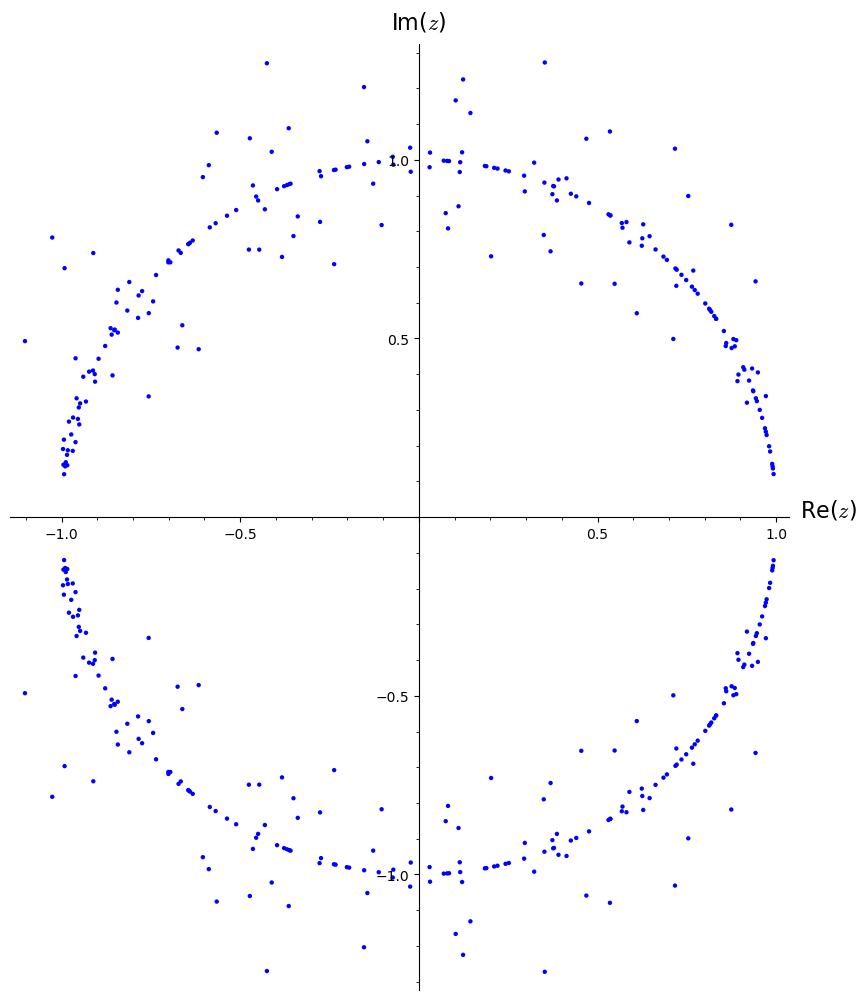

In [363]:

def complex_point_plot(pts): 
    """ 
    A function that returns a plot of a list of complex points. 
    Arguments: pts (a list of complex numbers) 
    Outputs: A list plot of the imaginary numbers 
    """ 
    return list_plot([(real(i), imag(i)) for i in pts], axes_labels = ['Re($z$)', 'Im($z$)'], size=10, aspect_ratio=1, figsize=[10.10,10])

complex_point_plot([root[0] for root in rooties])